<a href="https://colab.research.google.com/github/vidhata0428/Machine_Learning_01/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
air = pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/AirPassengers/AirPassengers.csv")
air.head(5)

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Holiday_week,Delayed_Cancelled_flight_ind,Inter_metro_flight_ratio,Bad_Weather_Ind,Technical_issues_ind
0,1,37824,517356,4.00000,NO,NO,0.70,YES,YES
1,2,43936,646086,2.67466,NO,YES,0.80,YES,YES
2,3,42896,638330,3.29473,NO,NO,0.90,NO,NO
3,4,35792,506492,3.85684,NO,NO,0.40,NO,NO
4,5,38624,609658,3.90757,NO,NO,0.87,NO,YES


In [2]:
air.shape

(80, 9)

In [7]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Week_num                      80 non-null     int64  
 1   Passengers                    80 non-null     int64  
 2   Promotion_Budget              80 non-null     int64  
 3   Service_Quality_Score         80 non-null     float64
 4   Holiday_week                  80 non-null     object 
 5   Delayed_Cancelled_flight_ind  80 non-null     object 
 6   Inter_metro_flight_ratio      80 non-null     float64
 7   Bad_Weather_Ind               80 non-null     object 
 8   Technical_issues_ind          80 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 5.8+ KB


In [8]:
air.columns.values

array(['Week_num', 'Passengers', 'Promotion_Budget',
       'Service_Quality_Score', 'Holiday_week',
       'Delayed_Cancelled_flight_ind', 'Inter_metro_flight_ratio',
       'Bad_Weather_Ind', 'Technical_issues_ind'], dtype=object)

In [10]:
air.describe()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Inter_metro_flight_ratio
count,80.0000,80.000000,8.000000e+01,80.000000,80.000000
mean,40.5000,44745.025000,6.254223e+05,2.781168,0.693000
std,23.2379,11267.155215,1.565143e+05,1.000204,0.158045
min,1.0000,28700.000000,3.656800e+05,0.855360,0.380000
25%,20.7500,36424.000000,5.178915e+05,1.931580,0.610000
50%,40.5000,43144.000000,5.979190e+05,3.108120,0.720000
75%,60.2500,48864.000000,6.885935e+05,3.608882,0.802500
max,80.0000,81228.000000,1.108254e+06,4.000000,0.900000


In [14]:
#Corelation between no_of_passengers & promotional_budget
import numpy as np
np.corrcoef(air.Passengers,air.Promotion_Budget)


array([[1.        , 0.96585103],
       [0.96585103, 1.        ]])

In [16]:
import statsmodels.formula.api as sm
model = sm.ols(formula="Passengers ~ Promotion_Budget",data=air)
fitted1=model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1084.
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           1.66e-47
Time:                        06:28:17   Log-Likelihood:                -751.34
No. Observations:                  80   AIC:                             1507.
Df Residuals:                      78   BIC:                             1511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1259.6058   1361.071      0.925      0.358   -1450.078    3969.290
Promotion_Budget     0.0695      0.002     32.923      0.000       0.065       0.074
==============================================================================
Omnibus:                       26.624   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.188
Skew:                          -0.128   Prob(JB):                       0.0747
Kurtosis:                       1.779   Cond. No.                     2.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#Prediction of passengers based on Beta0 and Beta1
#How many passengers we will get if promotion_budget is increased to 5 hundred thousand
passengers = 1259.6 + 0.0695*500000
passengers

70759.6

In [23]:
passengers = 1259.6 + 0.0695*517356
passengers

37215.842000000004

In [19]:
#Model-2
#Prediction of Passengers by inter_metro_flight_ratio
import numpy as np
np.corrcoef(air.Passengers,air.Inter_metro_flight_ratio)

#Corelation coeficient is 0.49 that measns very less association btw the 2 variables

array([[1.       , 0.4919468],
       [0.4919468, 1.       ]])

In [22]:
import statsmodels.formula.api as sm
model_2 = sm.ols(formula="Passengers ~ Inter_metro_flight_ratio" ,data=air)
fitted2=model_2.fit()
fitted2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     24.90
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           3.58e-06
Time:                        06:52:47   Log-Likelihood:                -848.30
No. Observations:                  80   AIC:                             1701.
Df Residuals:                      78   BIC:                             1705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2.044e+04   4993.747      4.093      0.000    1.05e+04    3.04e+04
Inter_metro_flight_ratio  3.507e+04   7027.768      4.990      0.000    2.11e+04    4.91e+04
==============================================================================
Omnibus:                       10.172   Durbin-Watson:                   1.385
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.098
Skew:                           0.822   Prob(JB):                      0.00641
Kurtosis:                       3.573   Cond. No.                         9.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#Multiple Regression
import statsmodels.formula.api as sm
model_3=sm.ols(formula="Passengers ~ Promotion_Budget+Inter_metro_flight_ratio+Service_Quality_Score",data=air)
result=model_3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     495.6
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           8.71e-50
Time:                        09:45:28   Log-Likelihood:                -738.45
No. Observations:                  80   AIC:                             1485.
Df Residuals:                      76   BIC:                             1494.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1.921e+04   3542.694      5.424      0.000    1.22e+04    2.63e+04
Promotion_Budget             0.0555      0.004     15.476      0.000       0.048       0.063
Inter_metro_flight_ratio -2003.4508   2129.095     -0.941      0.350   -6243.912    2237.010
Service_Quality_Score    -2802.0708    530.382     -5.283      0.000   -3858.419   -1745.723
==============================================================================
Omnibus:                        6.902   Durbin-Watson:                   2.312
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                2.759
Skew:                          -0.051   Prob(JB):                        0.252
Kurtosis:                       2.096   Cond. No.                     8.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(air[["Promotion_Budget"]+["Inter_metro_flight_ratio"]+["Service_Quality_Score"]],air[["Passengers"]])
prediction=lr.predict(air[["Promotion_Budget"]+["Inter_metro_flight_ratio"]+["Service_Quality_Score"]])
prediction[0:5]

array([[35317.77156438],
       [45975.98654361],
       [43607.68242143],
       [35716.96984575],
       [40359.19124421]])

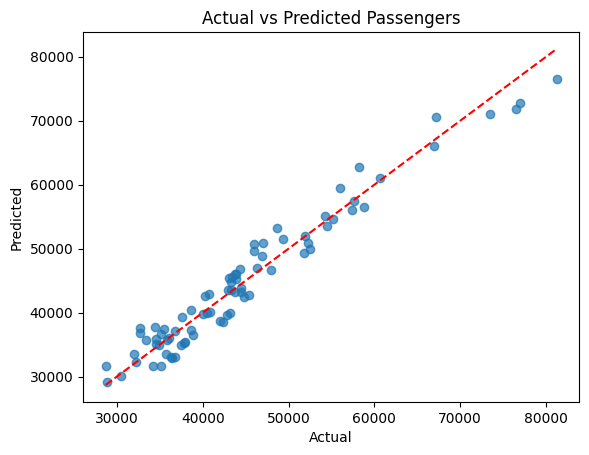

In [14]:
import matplotlib.pyplot as plt

plt.scatter(air["Passengers"], prediction, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Passengers")
plt.plot([air["Passengers"].min(), air["Passengers"].max()],
         [air["Passengers"].min(), air["Passengers"].max()],
         'r--')  # Diagonal line
plt.show()

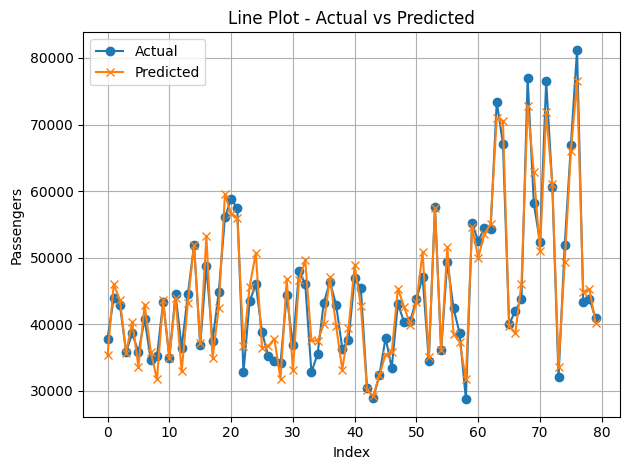

In [15]:
plt.plot(air["Passengers"].values, label="Actual", marker='o')
plt.plot(prediction, label="Predicted", marker='x')
plt.xlabel("Index")
plt.ylabel("Passengers")
plt.title("Line Plot - Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(air[["Promotion_Budget"]+["Inter_metro_flight_ratio"]+["Service_Quality_Score"]],air[["Passengers"]])
prediction=lr.predict(air[["Promotion_Budget"]+["Inter_metro_flight_ratio"]+["Service_Quality_Score"]])
prediction[0:5]